# **Actividad 4.3  (Regresión Logística Ajuste)**

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
df=pd.read_csv("DataAnalytics.csv")




df["botón correcto"]=df["botón correcto"].fillna(100) ###
df["tiempo de interacción"]=df["tiempo de interacción"].fillna(100)
df["mini juego"]=df["mini juego"].fillna(100)
df["número de interacción"]=df["número de interacción"].fillna(100)
df["color presionado"]=df["color presionado"].fillna(100)



df["auto push"]=df["auto push"].fillna(100)
df["tiempo de lección"]=df["tiempo de lección"].fillna(100)
df["tiempo de sesión"]=df["tiempo de sesión"].fillna(100)

In [42]:
df.head()

,Administrador,Usuario,botón correcto,tiempo de interacción,mini juego,número de interacción,color presionado,dificultad,fecha,Juego,auto push,tiempo de lección,tiempo de sesión
0,nicolas,nicolas,1.0,5.399169,Despegue,1.0,blue,Episodio 1,25/01/2024 09:26:42 a. m.,Astro,0.0,0.0,0.0
1,nicolas,nicolas,0.0,1.283400,Despegue,2.0,violet,Episodio 1,25/01/2024 09:26:46 a. m.,Astro,0.0,0.0,0.0
2,nicolas,nicolas,1.0,2.700226,Despegue,3.0,green,Episodio 1,25/01/2024 09:26:48 a. m.,Astro,0.0,0.0,0.0
3,nicolas,nicolas,0.0,3.050262,Despegue,4.0,green,Episodio 1,25/01/2024 09:26:57 a. m.,Astro,0.0,0.0,0.0
4,nicolas,nicolas,0.0,4.750256,Despegue,5.0,green,Episodio 1,25/01/2024 09:26:58 a. m.,Astro,0.0,0.0,0.0


## Convertir las variables categóricas ordinales (“Administrador”, “Usuario”, “mini juego”, “color presionado”, “dificultad” y “Juego”) en variables numéricas respecto a su frecuencia

In [43]:
frecuencias = df['Administrador'].value_counts()

# 2. Crear un diccionario de mapeo: nombre -> número según frecuencia
mapeo_numeros = {nombre: i+1 for i, (nombre, count) in enumerate(frecuencias.items())}

# 3. Aplicar el reemplazo en la columna
df['Administrador_cat'] = df['Administrador'].map(mapeo_numeros)

df['Administrador_cat'] = df['Administrador_cat'].astype(int)
print(frecuencias)

Administrador
ALEIDA            3260
nicolas            440
LEONARDO           371
DENISSE            302
SERGIO ANGEL       243
CARLOS ENRIQUE     228
YAEL DAVID         224
AUSTIN             199
VALENTIN           163
erick              158
IKER BENJAMIN      128
KYTZIA              98
BENJAMIN            51
Name: count, dtype: int64


In [44]:
frecuencias = df['Usuario'].value_counts()

# 2. Crear un diccionario de mapeo: nombre -> número según frecuencia
mapeo_numeros = {nombre: i+1 for i, (nombre, count) in enumerate(frecuencias.items())}

# 3. Aplicar el reemplazo en la columna
df['Usuario_cat'] = df['Usuario'].map(mapeo_numeros)

df['Usuario_cat'] = df['Usuario_cat'].astype(int)
print(frecuencias)

Usuario
LEONARDO              546
ALEIDA                487
nicolas               440
JOSE JAVIER           394
LEONARDO              371
JESUS ALEJANDRO       356
ramiro isai           332
ADRIAN                280
SERGIO ANGEL          243
DENISSE               228
CARLOS ENRIQUE        228
YAEL DAVID            224
VALENTIN              163
erick                 158
IKER BENJAMIN         152
NICOLAS |             128
ERICK OSVALDO         126
CONCEPCION            103
KYTZIA                 98
AUSTIN                 96
JOSE IGNACIO TADEO     94
JOSE IAN               86
ASHLEY                 75
JOSHUA                 74
YEREMI YAZMIN          71
MA DEL ROSARIO         64
BENJAMIN               51
INGRID                 49
RENE                   44
CARLOS ABEL            39
ARLETT                 29
ESMERALDA              24
IRVING                 10
jesus eduardo           2
Name: count, dtype: int64


In [45]:
frecuencias = df['mini juego'].value_counts()

# 2. Crear un diccionario de mapeo: nombre -> número según frecuencia
mapeo_numeros = {nombre: i+1 for i, (nombre, count) in enumerate(frecuencias.items())}

# 3. Aplicar el reemplazo en la columna
df['minijuego_cat'] = df['mini juego'].map(mapeo_numeros)

df['minijuego_cat'] = df['minijuego_cat'].astype(int)
print(frecuencias)

mini juego
Asteroides            1054
Restaurante            869
Estrellas              813
Gusanos                748
sonidos y animales     743
animales y colores     545
figuras y colores      400
partes del cuerpo      320
Despegue               196
100                    156
MiniGame_0               8
MiniGame_3               5
MiniGame_2               5
MiniGame_1               3
Name: count, dtype: int64


In [46]:
frecuencias = df['color presionado'].value_counts()

# 2. Crear un diccionario de mapeo: nombre -> número según frecuencia
mapeo_numeros = {nombre: i+1 for i, (nombre, count) in enumerate(frecuencias.items())}

# 3. Aplicar el reemplazo en la columna
df['color_cat'] = df['color presionado'].map(mapeo_numeros)

df['color_cat'] = df['color_cat'].astype(int)
print(frecuencias)

color presionado
violet    1361
green     1298
yellow    1233
blue      1182
100        762
red         29
Name: count, dtype: int64


In [47]:
frecuencias = df['dificultad'].value_counts()

# 2. Crear un diccionario de mapeo: nombre -> número según frecuencia
mapeo_numeros = {nombre: i+1 for i, (nombre, count) in enumerate(frecuencias.items())}

# 3. Aplicar el reemplazo en la columna
df['dificultad_cat'] = df['dificultad'].map(mapeo_numeros)

df['dificultad_cat'] = df['dificultad_cat'].astype(int)
print(frecuencias)

dificultad
Episodio 1    2357
Episodio 2    1493
Episodio 3    1292
Episodio 4     723
Name: count, dtype: int64


In [48]:
frecuencias = df['Juego'].value_counts()

# 2. Crear un diccionario de mapeo: nombre -> número según frecuencia
mapeo_numeros = {nombre: i+1 for i, (nombre, count) in enumerate(frecuencias.items())}

# 3. Aplicar el reemplazo en la columna
df['Juego_cat'] = df['Juego'].map(mapeo_numeros)

df['Juego_cat'] = df['Juego_cat'].astype(int)
print(frecuencias)

Juego
Astro      3799
Cadetes    2066
Name: count, dtype: int64


## Correlaciones

<Axes: >

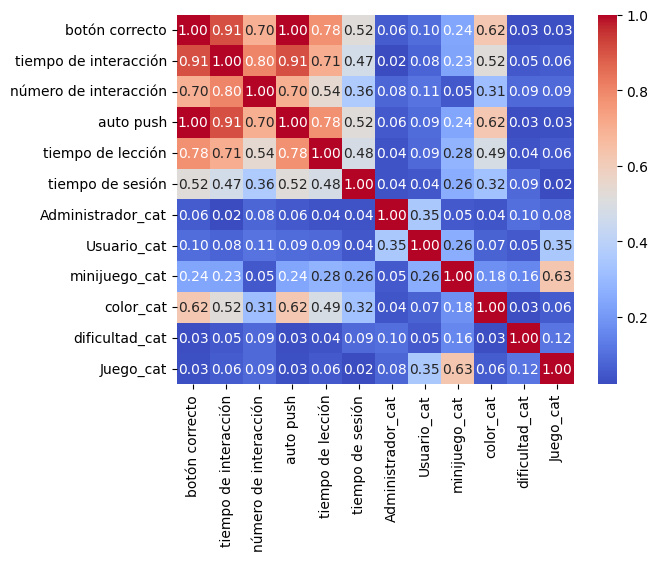

In [49]:
Dataframe_num=df.select_dtypes(["int","float","int64","float64"])

Corr_factors=Dataframe_num.corr()

#Obtener el valor absoluto
Corr_factors_abosluto=abs(Corr_factors)

#Ajustar el heatmap con los coeficientes de correlacion
Heat_map=sns.heatmap(Corr_factors_abosluto, cmap="coolwarm", annot=True, fmt=".2f")
Heat_map

In [50]:
df["auto push"].value_counts()

auto push
0.0      5049
100.0     762
1.0        54
Name: count, dtype: int64

In [51]:
df = df[df['botón correcto'] != 100]
df = df[df['auto push'] != 100]


In [52]:
precision1_lista=[]
precision2_lista=[]
exactitud_lista=[]
sensibilidad1_lista=[]
sensibilidad2_lista=[]

## Analizar la correlación logística que existe entre las variables dicotómicas de nuestra base de datos (botón correcto, juego, auto push)

### botón correcto

In [53]:
#### Reponderación de clases

Vars_Indep=df[["color_cat", "tiempo de lección", "número de interacción"]]
Var_dep=df["botón correcto"]

X=Vars_Indep
y=Var_dep

#Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

#Escalar los datos

escalar= StandardScaler()

X_train=escalar.fit_transform(X_train)
X_test=escalar.fit_transform(X_test)

#Definir el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo_pond=LogisticRegression(class_weight="balanced")
algoritmo_pond.fit(X_train, y_train)

algoritmo_pond.fit(X_train, y_train)

y_pred=algoritmo_pond.predict(X_test)

#Matriz de confusión
from sklearn.metrics import confusion_matrix
matriz=confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(matriz)
print("\n")

posLabel1=1
posLabel2=0

#Calcular la precisión
from sklearn.metrics import precision_score
precision1=precision_score(y_test, y_pred, average="binary", pos_label=posLabel1)
precision2=precision_score(y_test, y_pred, average="binary", pos_label=posLabel2)
print("Precision del modelo 1:")
print(precision1)
print("Precision del modelo 2:")
print(precision2)
print("\n")

#Calcular la exactitud
from sklearn.metrics import accuracy_score
exactitud=accuracy_score(y_test, y_pred)
print("Exactitud del modelo:")
print(exactitud)
print("\n")

#Calcular la sensibilidad
from sklearn.metrics import recall_score
sensibilidad1=recall_score(y_test, y_pred, average="binary", pos_label=posLabel1)
sensibilidad2=recall_score(y_test, y_pred, average="binary", pos_label=posLabel2)
print("Sensibilidad del modelo 1:")
print(sensibilidad1)
print("Sensibilidad del modelo 2:")
print(sensibilidad2)

precision1_lista.append(precision1)
precision2_lista.append(precision2)
exactitud_lista.append(exactitud)
sensibilidad1_lista.append(sensibilidad1)
sensibilidad2_lista.append(sensibilidad2)

Matriz de confusión:
[[366 394]
 [130 641]]


Precision del modelo 1:
0.6193236714975845
Precision del modelo 2:
0.7379032258064516


Exactitud del modelo:
0.6577400391900718


Sensibilidad del modelo 1:
0.8313878080415046
Sensibilidad del modelo 2:
0.48157894736842105


In [54]:
##### Oversampling
from imblearn.over_sampling import SMOTE
smote= SMOTE()
X_resampled, y_resampled=smote.fit_resample(X_train, y_train)

algoritmo_over_sampling=LogisticRegression()
algoritmo_over_sampling.fit(X_resampled, y_resampled)

y_pred_over_sampling=algoritmo_over_sampling.predict(X_test)
y_pred_over_sampling

#Matriz de confusión
from sklearn.metrics import confusion_matrix
matriz=confusion_matrix(y_test, y_pred_over_sampling)
print("Matriz de confusión:")
print(matriz)
print("\n")

posLabel1=1
posLabel2=0

#Calcular la precisión
from sklearn.metrics import precision_score
precision1=precision_score(y_test, y_pred_over_sampling, average="binary", pos_label=posLabel1)
precision2=precision_score(y_test, y_pred_over_sampling, average="binary", pos_label=posLabel2)
print("Precision del modelo 1:")
print(precision1)
print("Precision del modelo 2:")
print(precision2)
print("\n")

#Calcular la exactitud
from sklearn.metrics import accuracy_score
exactitud=accuracy_score(y_test, y_pred_over_sampling)
print("Exactitud del modelo:")
print(exactitud)
print("\n")

#Calcular la sensibilidad
from sklearn.metrics import recall_score
sensibilidad1=recall_score(y_test, y_pred_over_sampling, average="binary", pos_label=posLabel1)
sensibilidad2=recall_score(y_test, y_pred_over_sampling, average="binary", pos_label=posLabel2)
print("Sensibilidad del modelo 1:")
print(sensibilidad1)
print("Sensibilidad del modelo 2:")
print(sensibilidad2)

precision1_lista.append(precision1)
precision2_lista.append(precision2)
exactitud_lista.append(exactitud)
sensibilidad1_lista.append(sensibilidad1)
sensibilidad2_lista.append(sensibilidad2)


Matriz de confusión:
[[366 394]
 [130 641]]


Precision del modelo 1:
0.6193236714975845
Precision del modelo 2:
0.7379032258064516


Exactitud del modelo:
0.6577400391900718


Sensibilidad del modelo 1:
0.8313878080415046
Sensibilidad del modelo 2:
0.48157894736842105


### juego

In [55]:
#### Reponderación de clases

Vars_Indep=df[["color_cat", "tiempo de lección", "número de interacción"]]
Var_dep=df["Juego"]

X=Vars_Indep
y=Var_dep

#Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

#Escalar los datos

escalar= StandardScaler()

X_train=escalar.fit_transform(X_train)
X_test=escalar.fit_transform(X_test)

#Definir el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo_pond=LogisticRegression(class_weight="balanced")
algoritmo_pond.fit(X_train, y_train)

algoritmo_pond.fit(X_train, y_train)

y_pred=algoritmo_pond.predict(X_test)

#Matriz de confusión
from sklearn.metrics import confusion_matrix
matriz=confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(matriz)
print("\n")

posLabel1="Astro"
posLabel2="Cadetes"

#Calcular la precisión
from sklearn.metrics import precision_score
precision1=precision_score(y_test, y_pred, average="binary", pos_label=posLabel1)
precision2=precision_score(y_test, y_pred, average="binary", pos_label=posLabel2)
print("Precision del modelo 1:")
print(precision1)
print("Precision del modelo 2:")
print(precision2)
print("\n")

#Calcular la exactitud
from sklearn.metrics import accuracy_score
exactitud=accuracy_score(y_test, y_pred)
print("Exactitud del modelo:")
print(exactitud)
print("\n")

#Calcular la sensibilidad
from sklearn.metrics import recall_score
sensibilidad1=recall_score(y_test, y_pred, average="binary", pos_label=posLabel1)
sensibilidad2=recall_score(y_test, y_pred, average="binary", pos_label=posLabel2)
print("Sensibilidad del modelo 1:")
print(sensibilidad1)
print("Sensibilidad del modelo 2:")
print(sensibilidad2)

precision1_lista.append(precision1)
precision2_lista.append(precision2)
exactitud_lista.append(exactitud)
sensibilidad1_lista.append(sensibilidad1)
sensibilidad2_lista.append(sensibilidad2)

Matriz de confusión:
[[321 687]
 [110 413]]


Precision del modelo 1:
0.7447795823665894
Precision del modelo 2:
0.37545454545454543


Exactitud del modelo:
0.47942521227955587


Sensibilidad del modelo 1:
0.31845238095238093
Sensibilidad del modelo 2:
0.7896749521988528


In [56]:
##### Oversampling
from imblearn.over_sampling import SMOTE
smote= SMOTE()
X_resampled, y_resampled=smote.fit_resample(X_train, y_train)

algoritmo_over_sampling=LogisticRegression()
algoritmo_over_sampling.fit(X_resampled, y_resampled)

y_pred_over_sampling=algoritmo_over_sampling.predict(X_test)
y_pred_over_sampling

#Matriz de confusión
from sklearn.metrics import confusion_matrix
matriz=confusion_matrix(y_test, y_pred_over_sampling)
print("Matriz de confusión:")
print(matriz)
print("\n")

posLabel1="Astro"
posLabel2="Cadetes"

#Calcular la precisión
from sklearn.metrics import precision_score
precision1=precision_score(y_test, y_pred_over_sampling, average="binary", pos_label=posLabel1)
precision2=precision_score(y_test, y_pred_over_sampling, average="binary", pos_label=posLabel2)
print("Precision del modelo 1:")
print(precision1)
print("Precision del modelo 2:")
print(precision2)
print("\n")

#Calcular la exactitud
from sklearn.metrics import accuracy_score
exactitud=accuracy_score(y_test, y_pred_over_sampling)
print("Exactitud del modelo:")
print(exactitud)
print("\n")

#Calcular la sensibilidad
from sklearn.metrics import recall_score
sensibilidad1=recall_score(y_test, y_pred_over_sampling, average="binary", pos_label=posLabel1)
sensibilidad2=recall_score(y_test, y_pred_over_sampling, average="binary", pos_label=posLabel2)
print("Sensibilidad del modelo 1:")
print(sensibilidad1)
print("Sensibilidad del modelo 2:")
print(sensibilidad2)

precision1_lista.append(precision1)
precision2_lista.append(precision2)
exactitud_lista.append(exactitud)
sensibilidad1_lista.append(sensibilidad1)
sensibilidad2_lista.append(sensibilidad2)


Matriz de confusión:
[[321 687]
 [110 413]]


Precision del modelo 1:
0.7447795823665894
Precision del modelo 2:
0.37545454545454543


Exactitud del modelo:
0.47942521227955587


Sensibilidad del modelo 1:
0.31845238095238093
Sensibilidad del modelo 2:
0.7896749521988528


### auto push

In [57]:
Vars_Indep=df[["color_cat", "tiempo de lección", "número de interacción"]]
Var_dep=df["auto push"]

X=Vars_Indep
y=Var_dep

#Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

#Escalar los datos
escalar= StandardScaler()

X_train=escalar.fit_transform(X_train)
X_test=escalar.fit_transform(X_test)

#Definir el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo_pond=LogisticRegression(class_weight="balanced")
algoritmo_pond.fit(X_train, y_train)

algoritmo_pond.fit(X_train, y_train)

y_pred=algoritmo_pond.predict(X_test)

#Matriz de confusión
from sklearn.metrics import confusion_matrix
matriz=confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(matriz)
print("\n")

posLabel1=0
posLabel2=1

#Calcular la precisión
from sklearn.metrics import precision_score
precision1=precision_score(y_test, y_pred, average="binary", pos_label=posLabel1)
precision2=precision_score(y_test, y_pred, average="binary", pos_label=posLabel2)
print("Precision del modelo 1:")
print(precision1)
print("Precision del modelo 2:")
print(precision2)
print("\n")

#Calcular la exactitud
from sklearn.metrics import accuracy_score
exactitud=accuracy_score(y_test, y_pred)
print("Exactitud del modelo:")
print(exactitud)
print("\n")

#Calcular la sensibilidad
from sklearn.metrics import recall_score
sensibilidad1=recall_score(y_test, y_pred, average="binary", pos_label=posLabel1)
sensibilidad2=recall_score(y_test, y_pred, average="binary", pos_label=posLabel2)
print("Sensibilidad del modelo 1:")
print(sensibilidad1)
print("Sensibilidad del modelo 2:")
print(sensibilidad2)

precision1_lista.append(precision1)
precision2_lista.append(precision2)
exactitud_lista.append(exactitud)
sensibilidad1_lista.append(sensibilidad1)
sensibilidad2_lista.append(sensibilidad2)

Matriz de confusión:
[[ 509 1010]
 [   5    7]]


Precision del modelo 1:
0.9902723735408561
Precision del modelo 2:
0.00688298918387414


Exactitud del modelo:
0.3370346178967995


Sensibilidad del modelo 1:
0.33508887425938116
Sensibilidad del modelo 2:
0.5833333333333334


In [58]:
##### Oversampling
from imblearn.over_sampling import SMOTE
smote= SMOTE()
X_resampled, y_resampled=smote.fit_resample(X_train, y_train)

algoritmo_over_sampling=LogisticRegression()
algoritmo_over_sampling.fit(X_resampled, y_resampled)

y_pred_over_sampling=algoritmo_over_sampling.predict(X_test)
y_pred_over_sampling

#Matriz de confusión
from sklearn.metrics import confusion_matrix
matriz=confusion_matrix(y_test, y_pred_over_sampling)
print("Matriz de confusión:")
print(matriz)
print("\n")

posLabel1=0
posLabel2=1

#Calcular la precisión
from sklearn.metrics import precision_score
precision1=precision_score(y_test, y_pred_over_sampling, average="binary", pos_label=posLabel1)
precision2=precision_score(y_test, y_pred_over_sampling, average="binary", pos_label=posLabel2)
print("Precision del modelo 1:")
print(precision1)
print("Precision del modelo 2:")
print(precision2)
print("\n")

#Calcular la exactitud
from sklearn.metrics import accuracy_score
exactitud=accuracy_score(y_test, y_pred_over_sampling)
print("Exactitud del modelo:")
print(exactitud)
print("\n")

#Calcular la sensibilidad
from sklearn.metrics import recall_score
sensibilidad1=recall_score(y_test, y_pred_over_sampling, average="binary", pos_label=posLabel1)
sensibilidad2=recall_score(y_test, y_pred_over_sampling, average="binary", pos_label=posLabel2)
print("Sensibilidad del modelo 1:")
print(sensibilidad1)
print("Sensibilidad del modelo 2:")
print(sensibilidad2)

precision1_lista.append(precision1)
precision2_lista.append(precision2)
exactitud_lista.append(exactitud)
sensibilidad1_lista.append(sensibilidad1)
sensibilidad2_lista.append(sensibilidad2)

Matriz de confusión:
[[565 954]
 [  5   7]]


Precision del modelo 1:
0.9912280701754386
Precision del modelo 2:
0.007284079084287201


Exactitud del modelo:
0.3736120182887002


Sensibilidad del modelo 1:
0.3719552337063858
Sensibilidad del modelo 2:
0.5833333333333334


### color presionado (5)

#### Rojo

In [59]:
df2=df

df2 = df2[df2['botón correcto'] != 100]

#CONVERTIR UNA VARIABLE CATEGÓRICA A DICOTÓMICA

df2["color presionado"]=df2["color presionado"].replace(["blue", "green", "violet", "yellow"], "Otro")

Vars_Indep=df2[["botón correcto", "tiempo de lección", "número de interacción"]]
Var_dep=df2["color presionado"]

X=Vars_Indep
y=Var_dep

#Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

#Escalar los datos
escalar= StandardScaler()

X_train=escalar.fit_transform(X_train)
X_test=escalar.fit_transform(X_test)

#Definir el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo_pond=LogisticRegression(class_weight="balanced")
algoritmo_pond.fit(X_train, y_train)

algoritmo_pond.fit(X_train, y_train)

y_pred=algoritmo_pond.predict(X_test)

#Matriz de confusión
from sklearn.metrics import confusion_matrix
matriz=confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(matriz)
print("\n")

posLabel1="red"
posLabel2="Otro"

#Calcular la precisión
from sklearn.metrics import precision_score
precision1=precision_score(y_test, y_pred, average="binary", pos_label=posLabel1)
precision2=precision_score(y_test, y_pred, average="binary", pos_label=posLabel2)
print("Precision del modelo 1:")
print(precision1)
print("Precision del modelo 2:")
print(precision2)
print("\n")

#Calcular la exactitud
from sklearn.metrics import accuracy_score
exactitud=accuracy_score(y_test, y_pred)
print("Exactitud del modelo:")
print(exactitud)
print("\n")

#Calcular la sensibilidad
from sklearn.metrics import recall_score
sensibilidad1=recall_score(y_test, y_pred, average="binary", pos_label=posLabel1)
sensibilidad2=recall_score(y_test, y_pred, average="binary", pos_label=posLabel2)
print("Sensibilidad del modelo 1:")
print(sensibilidad1)
print("Sensibilidad del modelo 2:")
print(sensibilidad2)

precision1_lista.append(precision1)
precision2_lista.append(precision2)
exactitud_lista.append(exactitud)
sensibilidad1_lista.append(sensibilidad1)
sensibilidad2_lista.append(sensibilidad2)

Matriz de confusión:
[[891 631]
 [  0   9]]


Precision del modelo 1:
0.0140625
Precision del modelo 2:
1.0


Exactitud del modelo:
0.5878510777269759


Sensibilidad del modelo 1:
1.0
Sensibilidad del modelo 2:
0.5854139290407359


In [60]:
##### Oversampling
from imblearn.over_sampling import SMOTE
smote= SMOTE()
X_resampled, y_resampled=smote.fit_resample(X_train, y_train)

algoritmo_over_sampling=LogisticRegression()
algoritmo_over_sampling.fit(X_resampled, y_resampled)

y_pred_over_sampling=algoritmo_over_sampling.predict(X_test)
y_pred_over_sampling

#Matriz de confusión
from sklearn.metrics import confusion_matrix
matriz=confusion_matrix(y_test, y_pred_over_sampling)
print("Matriz de confusión:")
print(matriz)
print("\n")

posLabel1="red"
posLabel2="Otro"

#Calcular la precisión
from sklearn.metrics import precision_score
precision1=precision_score(y_test, y_pred_over_sampling, average="binary", pos_label=posLabel1)
precision2=precision_score(y_test, y_pred_over_sampling, average="binary", pos_label=posLabel2)
print("Precision del modelo 1:")
print(precision1)
print("Precision del modelo 2:")
print(precision2)
print("\n")

#Calcular la exactitud
from sklearn.metrics import accuracy_score
exactitud=accuracy_score(y_test, y_pred_over_sampling)
print("Exactitud del modelo:")
print(exactitud)
print("\n")

#Calcular la sensibilidad
from sklearn.metrics import recall_score
sensibilidad1=recall_score(y_test, y_pred_over_sampling, average="binary", pos_label=posLabel1)
sensibilidad2=recall_score(y_test, y_pred_over_sampling, average="binary", pos_label=posLabel2)
print("Sensibilidad del modelo 1:")
print(sensibilidad1)
print("Sensibilidad del modelo 2:")
print(sensibilidad2)

precision1_lista.append(precision1)
precision2_lista.append(precision2)
exactitud_lista.append(exactitud)
sensibilidad1_lista.append(sensibilidad1)
sensibilidad2_lista.append(sensibilidad2)

Matriz de confusión:
[[916 606]
 [  0   9]]


Precision del modelo 1:
0.014634146341463415
Precision del modelo 2:
1.0


Exactitud del modelo:
0.6041802743305029


Sensibilidad del modelo 1:
1.0
Sensibilidad del modelo 2:
0.6018396846254928


#### azul

In [61]:
df3=df

df3 = df3[df3['botón correcto'] != 100]

#CONVERTIR UNA VARIABLE CATEGÓRICA A DICOTÓMICA

df3["color presionado"]=df3["color presionado"].replace(["red", "green", "violet", "yellow"], "Otro")

Vars_Indep=df3[["botón correcto", "tiempo de lección", "número de interacción"]]
Var_dep=df3["color presionado"]

X=Vars_Indep
y=Var_dep

#Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

#Escalar los datos
escalar= StandardScaler()

X_train=escalar.fit_transform(X_train)
X_test=escalar.fit_transform(X_test)

#Definir el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo_pond=LogisticRegression(class_weight="balanced")
algoritmo_pond.fit(X_train, y_train)

algoritmo_pond.fit(X_train, y_train)

y_pred=algoritmo_pond.predict(X_test)

#Matriz de confusión
from sklearn.metrics import confusion_matrix
matriz=confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(matriz)
print("\n")

posLabel1="blue"
posLabel2="Otro"

#Calcular la precisión
from sklearn.metrics import precision_score
precision1=precision_score(y_test, y_pred, average="binary", pos_label=posLabel1)
precision2=precision_score(y_test, y_pred, average="binary", pos_label=posLabel2)
print("Precision del modelo 1:")
print(precision1)
print("Precision del modelo 2:")
print(precision2)
print("\n")

#Calcular la exactitud
from sklearn.metrics import accuracy_score
exactitud=accuracy_score(y_test, y_pred)
print("Exactitud del modelo:")
print(exactitud)
print("\n")

#Calcular la sensibilidad
from sklearn.metrics import recall_score
sensibilidad1=recall_score(y_test, y_pred, average="binary", pos_label=posLabel1)
sensibilidad2=recall_score(y_test, y_pred, average="binary", pos_label=posLabel2)
print("Sensibilidad del modelo 1:")
print(sensibilidad1)
print("Sensibilidad del modelo 2:")
print(sensibilidad2)

precision1_lista.append(precision1)
precision2_lista.append(precision2)
exactitud_lista.append(exactitud)
sensibilidad1_lista.append(sensibilidad1)
sensibilidad2_lista.append(sensibilidad2)

Matriz de confusión:
[[327 846]
 [ 87 271]]


Precision del modelo 1:
0.24261414503133394
Precision del modelo 2:
0.7898550724637681


Exactitud del modelo:
0.3905943827563684


Sensibilidad del modelo 1:
0.7569832402234636
Sensibilidad del modelo 2:
0.27877237851662406


In [62]:
##### Oversampling
from imblearn.over_sampling import SMOTE
smote= SMOTE()
X_resampled, y_resampled=smote.fit_resample(X_train, y_train)

algoritmo_over_sampling=LogisticRegression()
algoritmo_over_sampling.fit(X_resampled, y_resampled)

y_pred_over_sampling=algoritmo_over_sampling.predict(X_test)
y_pred_over_sampling

#Matriz de confusión
from sklearn.metrics import confusion_matrix
matriz=confusion_matrix(y_test, y_pred_over_sampling)
print("Matriz de confusión:")
print(matriz)
print("\n")

posLabel1="blue"
posLabel2="Otro"

#Calcular la precisión
from sklearn.metrics import precision_score
precision1=precision_score(y_test, y_pred_over_sampling, average="binary", pos_label=posLabel1)
precision2=precision_score(y_test, y_pred_over_sampling, average="binary", pos_label=posLabel2)
print("Precision del modelo 1:")
print(precision1)
print("Precision del modelo 2:")
print(precision2)
print("\n")

#Calcular la exactitud
from sklearn.metrics import accuracy_score
exactitud=accuracy_score(y_test, y_pred_over_sampling)
print("Exactitud del modelo:")
print(exactitud)
print("\n")

#Calcular la sensibilidad
from sklearn.metrics import recall_score
sensibilidad1=recall_score(y_test, y_pred_over_sampling, average="binary", pos_label=posLabel1)
sensibilidad2=recall_score(y_test, y_pred_over_sampling, average="binary", pos_label=posLabel2)
print("Sensibilidad del modelo 1:")
print(sensibilidad1)
print("Sensibilidad del modelo 2:")
print(sensibilidad2)

precision1_lista.append(precision1)
precision2_lista.append(precision2)
exactitud_lista.append(exactitud)
sensibilidad1_lista.append(sensibilidad1)
sensibilidad2_lista.append(sensibilidad2)

Matriz de confusión:
[[327 846]
 [ 87 271]]


Precision del modelo 1:
0.24261414503133394
Precision del modelo 2:
0.7898550724637681


Exactitud del modelo:
0.3905943827563684


Sensibilidad del modelo 1:
0.7569832402234636
Sensibilidad del modelo 2:
0.27877237851662406


#### verde

In [63]:
df4=df

df4 = df4[df4['botón correcto'] != 100]

#CONVERTIR UNA VARIABLE CATEGÓRICA A DICOTÓMICA

df4["color presionado"]=df4["color presionado"].replace(["red", "blue", "violet", "yellow"], "Otro")

Vars_Indep=df4[["botón correcto", "tiempo de lección", "número de interacción"]]
Var_dep=df4["color presionado"]

X=Vars_Indep
y=Var_dep

#Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

#Escalar los datos
escalar= StandardScaler()

X_train=escalar.fit_transform(X_train)
X_test=escalar.fit_transform(X_test)

#Definir el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo_pond=LogisticRegression(class_weight="balanced")
algoritmo_pond.fit(X_train, y_train)

algoritmo_pond.fit(X_train, y_train)

y_pred=algoritmo_pond.predict(X_test)

#Matriz de confusión
from sklearn.metrics import confusion_matrix
matriz=confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(matriz)
print("\n")

posLabel1="green"
posLabel2="Otro"

#Calcular la precisión
from sklearn.metrics import precision_score
precision1=precision_score(y_test, y_pred, average="binary", pos_label=posLabel1)
precision2=precision_score(y_test, y_pred, average="binary", pos_label=posLabel2)
print("Precision del modelo 1:")
print(precision1)
print("Precision del modelo 2:")
print(precision2)
print("\n")

#Calcular la exactitud
from sklearn.metrics import accuracy_score
exactitud=accuracy_score(y_test, y_pred)
print("Exactitud del modelo:")
print(exactitud)
print("\n")

#Calcular la sensibilidad
from sklearn.metrics import recall_score
sensibilidad1=recall_score(y_test, y_pred, average="binary", pos_label=posLabel1)
sensibilidad2=recall_score(y_test, y_pred, average="binary", pos_label=posLabel2)
print("Sensibilidad del modelo 1:")
print(sensibilidad1)
print("Sensibilidad del modelo 2:")
print(sensibilidad2)

precision1_lista.append(precision1)
precision2_lista.append(precision2)
exactitud_lista.append(exactitud)
sensibilidad1_lista.append(sensibilidad1)
sensibilidad2_lista.append(sensibilidad2)

Matriz de confusión:
[[305 839]
 [ 99 288]]


Precision del modelo 1:
0.25554569653948533
Precision del modelo 2:
0.754950495049505


Exactitud del modelo:
0.387328543435663


Sensibilidad del modelo 1:
0.7441860465116279
Sensibilidad del modelo 2:
0.2666083916083916


In [64]:
##### Oversampling
from imblearn.over_sampling import SMOTE
smote= SMOTE()
X_resampled, y_resampled=smote.fit_resample(X_train, y_train)

algoritmo_over_sampling=LogisticRegression()
algoritmo_over_sampling.fit(X_resampled, y_resampled)

y_pred_over_sampling=algoritmo_over_sampling.predict(X_test)
y_pred_over_sampling

#Matriz de confusión
from sklearn.metrics import confusion_matrix
matriz=confusion_matrix(y_test, y_pred_over_sampling)
print("Matriz de confusión:")
print(matriz)
print("\n")

posLabel1="green"
posLabel2="Otro"

#Calcular la precisión
from sklearn.metrics import precision_score
precision1=precision_score(y_test, y_pred_over_sampling, average="binary", pos_label=posLabel1)
precision2=precision_score(y_test, y_pred_over_sampling, average="binary", pos_label=posLabel2)
print("Precision del modelo 1:")
print(precision1)
print("Precision del modelo 2:")
print(precision2)
print("\n")

#Calcular la exactitud
from sklearn.metrics import accuracy_score
exactitud=accuracy_score(y_test, y_pred_over_sampling)
print("Exactitud del modelo:")
print(exactitud)
print("\n")

#Calcular la sensibilidad
from sklearn.metrics import recall_score
sensibilidad1=recall_score(y_test, y_pred_over_sampling, average="binary", pos_label=posLabel1)
sensibilidad2=recall_score(y_test, y_pred_over_sampling, average="binary", pos_label=posLabel2)
print("Sensibilidad del modelo 1:")
print(sensibilidad1)
print("Sensibilidad del modelo 2:")
print(sensibilidad2)

precision1_lista.append(precision1)
precision2_lista.append(precision2)
exactitud_lista.append(exactitud)
sensibilidad1_lista.append(sensibilidad1)
sensibilidad2_lista.append(sensibilidad2)

Matriz de confusión:
[[284 860]
 [ 93 294]]


Precision del modelo 1:
0.25476603119584057
Precision del modelo 2:
0.753315649867374


Exactitud del modelo:
0.3775310254735467


Sensibilidad del modelo 1:
0.7596899224806202
Sensibilidad del modelo 2:
0.24825174825174826


#### violeta

In [65]:
df5=df

df5 = df5[df5['botón correcto'] != 100]

#CONVERTIR UNA VARIABLE CATEGÓRICA A DICOTÓMICA

df5["color presionado"]=df5["color presionado"].replace(["red", "blue", "green", "yellow"], "Otro")

Vars_Indep=df5[["botón correcto", "tiempo de lección", "número de interacción"]]
Var_dep=df5["color presionado"]

X=Vars_Indep
y=Var_dep

#Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

#Escalar los datos
escalar= StandardScaler()

X_train=escalar.fit_transform(X_train)
X_test=escalar.fit_transform(X_test)

#Definir el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo_pond=LogisticRegression(class_weight="balanced")
algoritmo_pond.fit(X_train, y_train)

algoritmo_pond.fit(X_train, y_train)

y_pred=algoritmo_pond.predict(X_test)

#Matriz de confusión
from sklearn.metrics import confusion_matrix
matriz=confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(matriz)
print("\n")

posLabel1="violet"
posLabel2="Otro"

#Calcular la precisión
from sklearn.metrics import precision_score
precision1=precision_score(y_test, y_pred, average="binary", pos_label=posLabel1)
precision2=precision_score(y_test, y_pred, average="binary", pos_label=posLabel2)
print("Precision del modelo 1:")
print(precision1)
print("Precision del modelo 2:")
print(precision2)
print("\n")

#Calcular la exactitud
from sklearn.metrics import accuracy_score
exactitud=accuracy_score(y_test, y_pred)
print("Exactitud del modelo:")
print(exactitud)
print("\n")

#Calcular la sensibilidad
from sklearn.metrics import recall_score
sensibilidad1=recall_score(y_test, y_pred, average="binary", pos_label=posLabel1)
sensibilidad2=recall_score(y_test, y_pred, average="binary", pos_label=posLabel2)
print("Sensibilidad del modelo 1:")
print(sensibilidad1)
print("Sensibilidad del modelo 2:")
print(sensibilidad2)

precision1_lista.append(precision1)
precision2_lista.append(precision2)
exactitud_lista.append(exactitud)
sensibilidad1_lista.append(sensibilidad1)
sensibilidad2_lista.append(sensibilidad2)

Matriz de confusión:
[[924 207]
 [280 120]]


Precision del modelo 1:
0.3669724770642202
Precision del modelo 2:
0.7674418604651163


Exactitud del modelo:
0.681907250163292


Sensibilidad del modelo 1:
0.3
Sensibilidad del modelo 2:
0.8169761273209549


In [66]:
##### Oversampling
from imblearn.over_sampling import SMOTE
smote= SMOTE()
X_resampled, y_resampled=smote.fit_resample(X_train, y_train)

algoritmo_over_sampling=LogisticRegression()
algoritmo_over_sampling.fit(X_resampled, y_resampled)

y_pred_over_sampling=algoritmo_over_sampling.predict(X_test)
y_pred_over_sampling

#Matriz de confusión
from sklearn.metrics import confusion_matrix
matriz=confusion_matrix(y_test, y_pred_over_sampling)
print("Matriz de confusión:")
print(matriz)
print("\n")

posLabel1="violet"
posLabel2="Otro"

#Calcular la precisión
from sklearn.metrics import precision_score
precision1=precision_score(y_test, y_pred_over_sampling, average="binary", pos_label=posLabel1)
precision2=precision_score(y_test, y_pred_over_sampling, average="binary", pos_label=posLabel2)
print("Precision del modelo 1:")
print(precision1)
print("Precision del modelo 2:")
print(precision2)
print("\n")

#Calcular la exactitud
from sklearn.metrics import accuracy_score
exactitud=accuracy_score(y_test, y_pred_over_sampling)
print("Exactitud del modelo:")
print(exactitud)
print("\n")

#Calcular la sensibilidad
from sklearn.metrics import recall_score
sensibilidad1=recall_score(y_test, y_pred_over_sampling, average="binary", pos_label=posLabel1)
sensibilidad2=recall_score(y_test, y_pred_over_sampling, average="binary", pos_label=posLabel2)
print("Sensibilidad del modelo 1:")
print(sensibilidad1)
print("Sensibilidad del modelo 2:")
print(sensibilidad2)

precision1_lista.append(precision1)
precision2_lista.append(precision2)
exactitud_lista.append(exactitud)
sensibilidad1_lista.append(sensibilidad1)
sensibilidad2_lista.append(sensibilidad2)

Matriz de confusión:
[[943 188]
 [287 113]]


Precision del modelo 1:
0.3754152823920266
Precision del modelo 2:
0.7666666666666667


Exactitud del modelo:
0.689745264532985


Sensibilidad del modelo 1:
0.2825
Sensibilidad del modelo 2:
0.8337754199823165


#### amarillo

In [67]:
df6=df

df6 = df6[df6['botón correcto'] != 100]

#CONVERTIR UNA VARIABLE CATEGÓRICA A DICOTÓMICA

df6["color presionado"]=df6["color presionado"].replace(["red", "blue", "green", "violet"], "Otro")

Vars_Indep=df6[["botón correcto", "tiempo de lección", "número de interacción"]]
Var_dep=df6["color presionado"]

X=Vars_Indep
y=Var_dep

#Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

#Escalar los datos
escalar= StandardScaler()

X_train=escalar.fit_transform(X_train)
X_test=escalar.fit_transform(X_test)

#Definir el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo_pond=LogisticRegression(class_weight="balanced")
algoritmo_pond.fit(X_train, y_train)

algoritmo_pond.fit(X_train, y_train)

y_pred=algoritmo_pond.predict(X_test)

#Matriz de confusión
from sklearn.metrics import confusion_matrix
matriz=confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(matriz)
print("\n")

posLabel1="yellow"
posLabel2="Otro"

#Calcular la precisión
from sklearn.metrics import precision_score
precision1=precision_score(y_test, y_pred, average="binary", pos_label=posLabel1)
precision2=precision_score(y_test, y_pred, average="binary", pos_label=posLabel2)
print("Precision del modelo 1:")
print(precision1)
print("Precision del modelo 2:")
print(precision2)
print("\n")

#Calcular la exactitud
from sklearn.metrics import accuracy_score
exactitud=accuracy_score(y_test, y_pred)
print("Exactitud del modelo:")
print(exactitud)
print("\n")

#Calcular la sensibilidad
from sklearn.metrics import recall_score
sensibilidad1=recall_score(y_test, y_pred, average="binary", pos_label=posLabel1)
sensibilidad2=recall_score(y_test, y_pred, average="binary", pos_label=posLabel2)
print("Sensibilidad del modelo 1:")
print(sensibilidad1)
print("Sensibilidad del modelo 2:")
print(sensibilidad2)

precision1_lista.append(precision1)
precision2_lista.append(precision2)
exactitud_lista.append(exactitud)
sensibilidad1_lista.append(sensibilidad1)
sensibilidad2_lista.append(sensibilidad2)

Matriz de confusión:
[[321 836]
 [ 77 297]]


Precision del modelo 1:
0.2621359223300971
Precision del modelo 2:
0.8065326633165829


Exactitud del modelo:
0.4036577400391901


Sensibilidad del modelo 1:
0.7941176470588235
Sensibilidad del modelo 2:
0.27744165946413135


In [68]:
##### Oversampling
from imblearn.over_sampling import SMOTE
smote= SMOTE()
X_resampled, y_resampled=smote.fit_resample(X_train, y_train)

algoritmo_over_sampling=LogisticRegression()
algoritmo_over_sampling.fit(X_resampled, y_resampled)

y_pred_over_sampling=algoritmo_over_sampling.predict(X_test)
y_pred_over_sampling

#Matriz de confusión
from sklearn.metrics import confusion_matrix
matriz=confusion_matrix(y_test, y_pred_over_sampling)
print("Matriz de confusión:")
print(matriz)
print("\n")

posLabel1="yellow"
posLabel2="Otro"

#Calcular la precisión
from sklearn.metrics import precision_score
precision1=precision_score(y_test, y_pred_over_sampling, average="binary", pos_label=posLabel1)
precision2=precision_score(y_test, y_pred_over_sampling, average="binary", pos_label=posLabel2)
print("Precision del modelo 1:")
print(precision1)
print("Precision del modelo 2:")
print(precision2)
print("\n")

#Calcular la exactitud
from sklearn.metrics import accuracy_score
exactitud=accuracy_score(y_test, y_pred_over_sampling)
print("Exactitud del modelo:")
print(exactitud)
print("\n")

#Calcular la sensibilidad
from sklearn.metrics import recall_score
sensibilidad1=recall_score(y_test, y_pred_over_sampling, average="binary", pos_label=posLabel1)
sensibilidad2=recall_score(y_test, y_pred_over_sampling, average="binary", pos_label=posLabel2)
print("Sensibilidad del modelo 1:")
print(sensibilidad1)
print("Sensibilidad del modelo 2:")
print(sensibilidad2)

precision1_lista.append(precision1)
precision2_lista.append(precision2)
exactitud_lista.append(exactitud)
sensibilidad1_lista.append(sensibilidad1)
sensibilidad2_lista.append(sensibilidad2)

Matriz de confusión:
[[335 822]
 [ 83 291]]


Precision del modelo 1:
0.261455525606469
Precision del modelo 2:
0.8014354066985646


Exactitud del modelo:
0.40888308295231873


Sensibilidad del modelo 1:
0.7780748663101604
Sensibilidad del modelo 2:
0.2895419187554019


### Mini juego (2)

#### mini juego #1 Asteroides

In [69]:
df2=df.copy()


In [70]:

#CONVERTIR UNA VARIABLE CATEGÓRICA A DICOTÓMICA

df2["mini juego"]=df2["mini juego"].replace(["Restaurante", "Estrellas", "Gusanos", "sonidos y animales", "animales y colores",
                                             "figuras y colores", "partes del cuerpo", "Despegue"] , "Otro")

Vars_Indep=df2[["botón correcto", "tiempo de lección", "número de interacción"]]
Var_dep=df2["mini juego"]

X=Vars_Indep
y=Var_dep

#Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

#Escalar los datos
escalar= StandardScaler()

X_train=escalar.fit_transform(X_train)
X_test=escalar.fit_transform(X_test)

#Definir el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo_pond=LogisticRegression(class_weight="balanced")
algoritmo_pond.fit(X_train, y_train)

algoritmo_pond.fit(X_train, y_train)

y_pred=algoritmo_pond.predict(X_test)

#Matriz de confusión
from sklearn.metrics import confusion_matrix
matriz=confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(matriz)
print("\n")

posLabel1="Asteroides"
posLabel2="Otro"

#Calcular la precisión
from sklearn.metrics import precision_score
precision1=precision_score(y_test, y_pred, average="binary", pos_label=posLabel1)
precision2=precision_score(y_test, y_pred, average="binary", pos_label=posLabel2)
print("Precision del modelo 1:")
print(precision1)
print("Precision del modelo 2:")
print(precision2)
print("\n")

#Calcular la exactitud
from sklearn.metrics import accuracy_score
exactitud=accuracy_score(y_test, y_pred)
print("Exactitud del modelo:")
print(exactitud)
print("\n")

#Calcular la sensibilidad
from sklearn.metrics import recall_score
sensibilidad1=recall_score(y_test, y_pred, average="binary", pos_label=posLabel1)
sensibilidad2=recall_score(y_test, y_pred, average="binary", pos_label=posLabel2)
print("Sensibilidad del modelo 1:")
print(sensibilidad1)
print("Sensibilidad del modelo 2:")
print(sensibilidad2)

precision1_lista.append(precision1)
precision2_lista.append(precision2)
exactitud_lista.append(exactitud)
sensibilidad1_lista.append(sensibilidad1)
sensibilidad2_lista.append(sensibilidad2)

Matriz de confusión:
[[183  77]
 [940 331]]


Precision del modelo 1:
0.16295636687444345
Precision del modelo 2:
0.8112745098039216


Exactitud del modelo:
0.3357282821685173


Sensibilidad del modelo 1:
0.7038461538461539
Sensibilidad del modelo 2:
0.26042486231313927


In [71]:
##### Oversampling
from imblearn.over_sampling import SMOTE
smote= SMOTE()
X_resampled, y_resampled=smote.fit_resample(X_train, y_train)

algoritmo_over_sampling=LogisticRegression()
algoritmo_over_sampling.fit(X_resampled, y_resampled)

y_pred_over_sampling=algoritmo_over_sampling.predict(X_test)
y_pred_over_sampling

#Matriz de confusión
from sklearn.metrics import confusion_matrix
matriz=confusion_matrix(y_test, y_pred_over_sampling)
print("Matriz de confusión:")
print(matriz)
print("\n")

posLabel1="Asteroides"
posLabel2="Otro"

#Calcular la precisión
from sklearn.metrics import precision_score
precision1=precision_score(y_test, y_pred_over_sampling, average="binary", pos_label=posLabel1)
precision2=precision_score(y_test, y_pred_over_sampling, average="binary", pos_label=posLabel2)
print("Precision del modelo 1:")
print(precision1)
print("Precision del modelo 2:")
print(precision2)
print("\n")

#Calcular la exactitud
from sklearn.metrics import accuracy_score
exactitud=accuracy_score(y_test, y_pred_over_sampling)
print("Exactitud del modelo:")
print(exactitud)
print("\n")

#Calcular la sensibilidad
from sklearn.metrics import recall_score
sensibilidad1=recall_score(y_test, y_pred_over_sampling, average="binary", pos_label=posLabel1)
sensibilidad2=recall_score(y_test, y_pred_over_sampling, average="binary", pos_label=posLabel2)
print("Sensibilidad del modelo 1:")
print(sensibilidad1)
print("Sensibilidad del modelo 2:")
print(sensibilidad2)

precision1_lista.append(precision1)
precision2_lista.append(precision2)
exactitud_lista.append(exactitud)
sensibilidad1_lista.append(sensibilidad1)
sensibilidad2_lista.append(sensibilidad2)


Matriz de confusión:
[[191  69]
 [993 278]]


Precision del modelo 1:
0.16131756756756757
Precision del modelo 2:
0.8011527377521613


Exactitud del modelo:
0.30633572828216854


Sensibilidad del modelo 1:
0.7346153846153847
Sensibilidad del modelo 2:
0.2187254130605822


#### mini juego #2 Restaurante

In [72]:
df2=df.copy()

#CONVERTIR UNA VARIABLE CATEGÓRICA A DICOTÓMICA

df2["mini juego"]=df2["mini juego"].replace(["Asteroides", "Estrellas", "Gusanos", "sonidos y animales", "animales y colores",
                                             "figuras y colores", "partes del cuerpo", "Despegue"] , "Otro")

Vars_Indep=df2[["botón correcto", "tiempo de lección", "número de interacción"]]
Var_dep=df2["mini juego"]

X=Vars_Indep
y=Var_dep

#Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

#Escalar los datos
escalar= StandardScaler()

X_train=escalar.fit_transform(X_train)
X_test=escalar.fit_transform(X_test)

#Definir el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo_pond=LogisticRegression(class_weight="balanced")
algoritmo_pond.fit(X_train, y_train)

algoritmo_pond.fit(X_train, y_train)

y_pred=algoritmo_pond.predict(X_test)

#Matriz de confusión
from sklearn.metrics import confusion_matrix
matriz=confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(matriz)
print("\n")

posLabel1="Restaurante"
posLabel2="Otro"

#Calcular la precisión
from sklearn.metrics import precision_score
precision1=precision_score(y_test, y_pred, average="binary", pos_label=posLabel1)
precision2=precision_score(y_test, y_pred, average="binary", pos_label=posLabel2)
print("Precision del modelo 1:")
print(precision1)
print("Precision del modelo 2:")
print(precision2)
print("\n")

#Calcular la exactitud
from sklearn.metrics import accuracy_score
exactitud=accuracy_score(y_test, y_pred)
print("Exactitud del modelo:")
print(exactitud)
print("\n")

#Calcular la sensibilidad
from sklearn.metrics import recall_score
sensibilidad1=recall_score(y_test, y_pred, average="binary", pos_label=posLabel1)
sensibilidad2=recall_score(y_test, y_pred, average="binary", pos_label=posLabel2)
print("Sensibilidad del modelo 1:")
print(sensibilidad1)
print("Sensibilidad del modelo 2:")
print(sensibilidad2)

precision1_lista.append(precision1)
precision2_lista.append(precision2)
exactitud_lista.append(exactitud)
sensibilidad1_lista.append(sensibilidad1)
sensibilidad2_lista.append(sensibilidad2)

Matriz de confusión:
[[1130  182]
 [ 144   75]]


Precision del modelo 1:
0.2918287937743191
Precision del modelo 2:
0.8869701726844584


Exactitud del modelo:
0.7870672762900065


Sensibilidad del modelo 1:
0.3424657534246575
Sensibilidad del modelo 2:
0.8612804878048781


In [73]:
##### Oversampling
from imblearn.over_sampling import SMOTE
smote= SMOTE()
X_resampled, y_resampled=smote.fit_resample(X_train, y_train)

algoritmo_over_sampling=LogisticRegression()
algoritmo_over_sampling.fit(X_resampled, y_resampled)

y_pred_over_sampling=algoritmo_over_sampling.predict(X_test)
y_pred_over_sampling

#Matriz de confusión
from sklearn.metrics import confusion_matrix
matriz=confusion_matrix(y_test, y_pred_over_sampling)
print("Matriz de confusión:")
print(matriz)
print("\n")

posLabel1="Restaurante"
posLabel2="Otro"

#Calcular la precisión
from sklearn.metrics import precision_score
precision1=precision_score(y_test, y_pred_over_sampling, average="binary", pos_label=posLabel1)
precision2=precision_score(y_test, y_pred_over_sampling, average="binary", pos_label=posLabel2)
print("Precision del modelo 1:")
print(precision1)
print("Precision del modelo 2:")
print(precision2)
print("\n")

#Calcular la exactitud
from sklearn.metrics import accuracy_score
exactitud=accuracy_score(y_test, y_pred_over_sampling)
print("Exactitud del modelo:")
print(exactitud)
print("\n")

#Calcular la sensibilidad
from sklearn.metrics import recall_score
sensibilidad1=recall_score(y_test, y_pred_over_sampling, average="binary", pos_label=posLabel1)
sensibilidad2=recall_score(y_test, y_pred_over_sampling, average="binary", pos_label=posLabel2)
print("Sensibilidad del modelo 1:")
print(sensibilidad1)
print("Sensibilidad del modelo 2:")
print(sensibilidad2)

precision1_lista.append(precision1)
precision2_lista.append(precision2)
exactitud_lista.append(exactitud)
sensibilidad1_lista.append(sensibilidad1)
sensibilidad2_lista.append(sensibilidad2)


Matriz de confusión:
[[1126  186]
 [ 144   75]]


Precision del modelo 1:
0.28735632183908044
Precision del modelo 2:
0.8866141732283465


Exactitud del modelo:
0.7844546048334422


Sensibilidad del modelo 1:
0.3424657534246575
Sensibilidad del modelo 2:
0.8582317073170732


### lista

In [ ]:
valores=["boton correcto", "juego", "autopush", "color rojo", "color azul", "coloe verde", "color violeta", "color amarillo",
         "dificultad", "minijuego asteroides", "minijuego restaurante", "numero de interacciones", "usuario jose ian", "usuario jose ignacio tadeo",
         "usuario jose javier", "usuario joshua", "usuario kytzia"]

valores=["botón correcto Reponderacion", "botón correcto oversampling", "juego Reponderacion", "juego Oversampling", 
         "autopush Reponderacion", "autopush Oversampling", "color rojo Reponderacion", "color rojo Oversampling",
         "color azul Reponderacion", "color azul Oversampling", "color verde Reponderacion", "color verde Oversampling",
         "color violeta Reponderacion", "color violeta Oversampling", "color amarillo Reponderacion", "color amarillo Oversampling",
         "minijuego asteroides Reponderacion", "minijuego asteroides Oversampling","minijuego restaurante Reponderacion", "minijuego restaurante Oversampling" ]

tabla = pd.DataFrame({
    "Valor": valores,
    "Precisión Pos Label 1": precision1_lista,
    "Sensibilidad Pos Label 1" : sensibilidad1_lista,
    "Exactitud": exactitud_lista,
    "Precisión Pos Label 2": precision2_lista,
    "Sensibilidad Pos Label 2" : sensibilidad2_lista

    
})

tabla

,Valor,Precisión Pos Label 1,Sensibilidad Pos Label 1,Exactitud,Precisión Pos Label 2,Sensibilidad Pos Label 2
0,botón correcto Reponderacion,0.619324,0.831388,0.657740,0.737903,0.481579
1,botón correcto oversampling,0.619324,0.831388,0.657740,0.737903,0.481579
2,juego Reponderacion,0.744780,0.318452,0.479425,0.375455,0.789675
3,juego Oversampling,0.744780,0.318452,0.479425,0.375455,0.789675
4,autopush Reponderacion,0.990272,0.335089,0.337035,0.006883,0.583333
5,autopush Oversampling,0.991228,0.371955,0.373612,0.007284,0.583333
6,color rojo Reponderacion,0.014063,1.000000,0.587851,1.000000,0.585414
7,color rojo Oversampling,0.014634,1.000000,0.604180,1.000000,0.601840
8,color azul Reponderacion,0.242614,0.756983,0.390594,0.789855,0.278772
9,color azul Oversampling,0.242614,0.756983,0.390594,0.789855,0.278772
